**1. Libraries and data cleaning**

In [70]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler #For data with outliers
from sklearn.preprocessing import StandardScaler #For normally distributed data
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc
from plotly.subplots import make_subplots
import itertools
import mlflow
import mlflow.sklearn
# The following two lines are for the error: Script error for plotly.
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import plotly

In [7]:
path = (r'C:\Users\luism\OneDrive\m_Tesis\data_to.xlsx')

In [50]:
df = pd.read_excel(path)
df.head()

,FECHA DE INGRESO,FECHA DE BAJA,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia,Motivo de renuncia
0,2023-11-21 00:00:00,22/11/2023,baja,1.0,1979-08-26,Si,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,SECUNDARIA,FEMENINO,RENUNCIA VOLUNTARIA,SE LE COMPLICÓ EL HORARIO DEL TRANSPORTE PARA ...
1,2023-10-16 00:00:00,17/10/2023,baja,1.0,1993-09-02,NO,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,SECUNDARIA_TRUNCA,FEMENINO,SEPARACION VOLUNTARIA,PROBLEMA PERSONAL
2,2022-02-21 00:00:00,22/02/2022,baja,1.0,1993-10-17,NO,OP PRODUCCION,PRODUCCION,C,TALA,200.0,6000.0,SECUNDARIA,FEMENINO,ABANDONO,SOLO ACUDIÓ A INDUCCION
3,2022-02-21 00:00:00,22/02/2022,baja,1.0,1999-08-27,NO,OP PRODUCCION,PRODUCCION,C,TALA,200.0,6000.0,SECUNDARIA,FEMENINO,ABANDONO,SOLO ACUDIÓ A INDUCCION
4,2023-10-23 00:00:00,24/10/2023,baja,1.0,2002-06-16,NO,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,PREPARATORIA,FEMENINO,SEPARACION VOLUNTARIA,ENVIARON A TRABJAR FORANEO A SU ESPOSO Y EL CU...


In [57]:
#Choose variables to work with: Estatus, PUESTO, AREA, TURNO, MUNICIPIO, GENERO, ESCOLARIDAD

df = pd.read_excel(path, usecols=['Estatus', 'PUESTO', 'AREA', 'TURNO', 'MUNICIPIO', 'GENERO', 'ESCOLARIDAD'])
df.head(5)

,Estatus,PUESTO,AREA,TURNO,MUNICIPIO,ESCOLARIDAD,GENERO
0,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA,FEMENINO
1,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA_TRUNCA,FEMENINO
2,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA,FEMENINO
3,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA,FEMENINO
4,baja,OP PRODUCCION,PRODUCCION,C,TALA,PREPARATORIA,FEMENINO


In [58]:
missing_values_count = df.isnull().sum()
missing_values_count

Estatus        0
PUESTO         0
AREA           4
TURNO          0
MUNICIPIO      0
ESCOLARIDAD    0
GENERO         0
dtype: int64

In [59]:
# Fill missing values with mode

for col in ['AREA']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.isnull().sum()

Estatus        0
PUESTO         0
AREA           0
TURNO          0
MUNICIPIO      0
ESCOLARIDAD    0
GENERO         0
dtype: int64

**2. Data Analysis** <br>
<br>
**2.1. Descriptive statistics**

In [60]:
df.shape

(502, 7)

In [61]:
print(df.Estatus.unique())
print(df.PUESTO.unique())
print(df.AREA.unique())
print(df.TURNO.unique())
print(df.MUNICIPIO.unique())
print(df.GENERO.unique())
print(df.ESCOLARIDAD.unique())

['baja' 'activo']
['OP PRODUCCION' 'OP PRENSA' 'AUXILIAR ALMACEN' 'INSP CALIDAD'
 'MONTACARGUISTA' 'INTENDENCIA' 'MECANICO']
['PRODUCCION' 'PRENSA' 'ALMACEN' 'CALIDAD' 'MANTENIMIENTO']
['C' 'B' 'A' 'ROLA']
['TALA' 'TLAJOMULCO' 'AHUISCULCO ' 'ZAP' 'HUAXTLA'
 'LA VENTA DEL ASTILLERO ' 'ZAMORA' 'EL ARENAL' 'BUENA VISTA ' 'JALISCO'
 'CD GUZMAN' 'HUAXTLA ' 'SAN JUAN DE LOS ARCOS ']
['FEMENINO' 'MASCULINO']
['SECUNDARIA' 'SECUNDARIA_TRUNCA' 'PREPARATORIA' 'PREPARATORIA_TRUNCA'
 'PRIMARIA' 'CURSANDO_LICENCIATURA' 'INGENIERO' 'SIN_ESTUDIOS'
 'PREPARATORIA_TECNICA' 'CURSANDO_PREPARATORIA' 'CURSANDO_SECUNDARIA'
 'LICENCIATURA']


In [62]:
df.describe()

,Estatus,PUESTO,AREA,TURNO,MUNICIPIO,ESCOLARIDAD,GENERO
count,502,502,502,502,502,502,502
unique,2,7,5,4,13,12,2
top,baja,OP PRODUCCION,PRODUCCION,C,TALA,SECUNDARIA,FEMENINO
freq,431,268,272,200,465,210,266


In [64]:
contingecy = pd.crosstab(index=[df['Estatus'], df['PUESTO'], df['AREA'], df['TURNO'], df['MUNICIPIO']], 
                                  columns=[df['GENERO'], df['ESCOLARIDAD']])

# contingecy tables
print(contingecy)

GENERO                                                                            FEMENINO  \
ESCOLARIDAD                                                          CURSANDO_LICENCIATURA   
Estatus PUESTO           AREA          TURNO MUNICIPIO                                       
activo  AUXILIAR ALMACEN ALMACEN       A     TALA                                        0   
                                       B     TALA                                        0   
        INSP CALIDAD     CALIDAD       A     TALA                                        0   
                                       B     TALA                                        0   
                                       C     TALA                                        0   
        INTENDENCIA      PRODUCCION    B     TALA                                        0   
        MECANICO         MANTENIMIENTO ROLA  ZAP                                         0   
        MONTACARGUISTA   ALMACEN       A     CD GUZMAN      

**2.3. Distribution of target variable**

In [65]:
fig = go.Figure(data=[go.Pie(labels=['baja','activo'], values=df['Estatus'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2)))
fig.show()

**2.2. Outliers detection** 

In [66]:
names = df.columns[1:7]
# make df a list
values=[] 
for column in df.iloc[:,1:7].columns:
    li = df[column].tolist()
    values.append(li)
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan', 'royalblue']

fig = go.Figure()
for xd, yd, cls in zip(names, values, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='outliers',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=3,
            line_width=2)
        )
fig.show()

**2.4. Visualization and analysis of joint distribution**

c:\Users\luism\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



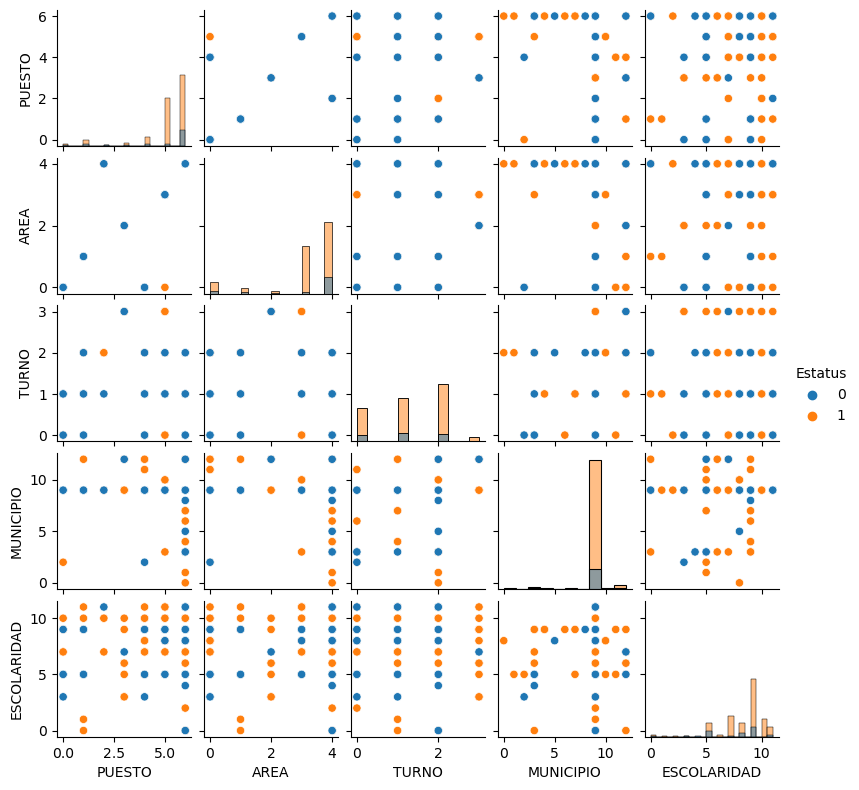

In [72]:
sns.pairplot(df.iloc[:,:6],hue='Estatus', diag_kind='hist',height=1.6)

**2.5. Correlation matrix**

In [11]:
corr = df.iloc[:,1:].corr()
fig = go.Figure(data=go.Heatmap(z=np.array(corr),x=corr.columns.tolist(),y=corr.columns.tolist(),xgap = 1,ygap = 1))
fig.update_layout(margin = dict(t=25,r=0,b=200,l=200),width = 1000, height = 700)
fig.show()

**3. Data preprocessing**<br>
<br>
**3.1. Label Encoding**

In [67]:
categorical = ['Estatus', 'PUESTO', 'AREA', 'TURNO', 'MUNICIPIO', 'GENERO', 'ESCOLARIDAD']
for feature in categorical:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

print(df['GENERO'].value_counts())

GENERO
0    266
1    236
Name: count, dtype: int64


**3.2. Data split**

In [68]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['Estatus'], test_size = 0.2, random_state = random_state)

**3.3. Feature engineering**<br>
<br>
**3.3.1. Scaler**

In machine learning, many algorithms are sensitive to features with different scales, so it is important to scale numeric input variables to a standard range. In this case, we observed in box plots that some features contain a few extreme outliers that are not easy to remove or replace. Extreme outliers often negatively influence the mean/variance of the sample. Therefore, we use RobustScaler since this scaler is robust to outliers by removing the median and scaling the data according to the interquartile range.

In [71]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

**3.3.2. Dimensionality reduction**


Based on the correlation matrix and joint/marginal distribution plots, we observe that some features are highly correlated, such as radius_mean, perimeter_mean, and area_mean. These features have almost the same effect on the dependent variable. Classification algorithms that include too many features in the dataset commonly suffer from the "Curse of Dimensionality," which means more data, voluminous computations, and also the risk of overfitting. Both feature selection (choosing specific features to include) and feature extraction (creating a new set of features from the input features) can help avoid these problems.

- **Principal Component Analysis PCA**

In [73]:
pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.line(x=np.arange(1,exp_var_cumul.shape[0]+1), y=exp_var_cumul, markers=True, labels={'x':'# of components', 'y':'Cumulative Explained Variance'})

#fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=30, y0=0.95, y1=0.95)

fig.show()


There is an elbow after the seventh component, and 91% of the total variance is explained by the first seven components. If we keep the first 10 or 17 principal components, we can preserve approximately 95% or even more than 99% of the total variance.

- **Recursive Feature Elimination (RFE)**

Recursive Feature Elimination (RFE) is a feature selection method. The process involves training a separate model and, each time, removing the weakest features until reaching the optimal set of features to achieve the best possible results.

Optimal number of features : 2


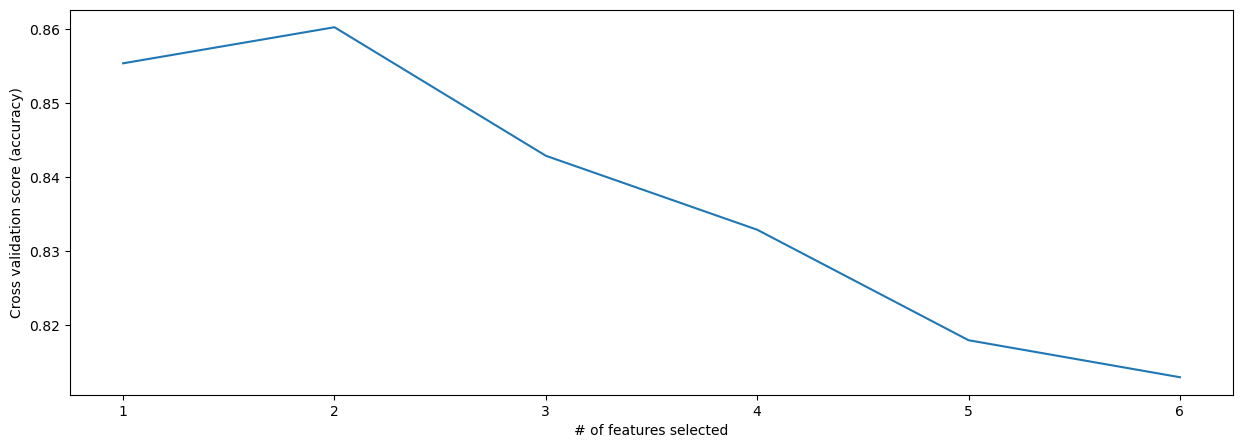

In [74]:
# Fit the RFE model to identify the optimal number of components.
rfecv = RFECV(cv=StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True),
      estimator=DecisionTreeClassifier(), scoring='accuracy')
    
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot component number VS. cross-validation scores
plt.figure(figsize=(15,5))
plt.xlabel("# of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    rfecv.cv_results_['mean_test_score'],
)
plt.show()


We can visualize how the model's performance changes as the number of features increases by plotting the number of features used in the model versus the model's accuracy. As you can see, more features are not always better. The accuracy value reaches its maximum when the first # important features are used in the model.

In [75]:
# Identifying the features selected by RFE
features_list = []

for i in range(X_train.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    features_list.append(row)

# Make the list in a DataFrame
df_features = pd.DataFrame(features_list)

# Show the 10 features with the lowest rankings
df_features.sort_values(by='ranking').head(10)

,feature,support,ranking
3,3,True,1
4,4,True,1
2,2,False,2
1,1,False,3
0,0,False,4
5,5,False,5


In [76]:
# Identify the names of the RFE selected features.
df.columns[1:][rfecv.get_support()]

Index(['MUNICIPIO', 'ESCOLARIDAD'], dtype='object')

**4. Grid Search Cross validation**<br>
<br>
**4. 1. find best hiperparameters**

In [77]:
def modelselection(classifier, parameters, scoring, X_train):
    clf = GridSearchCV(estimator=classifier,
                   param_grid=parameters,
                   scoring= scoring,
                   cv=5,
                   n_jobs=-1)# n_jobs  is the number of CPUs you want to use for execution. Setting it to -1 will utilize all available computing power
    clf.fit(X_train, y_train)
    cv_results = clf.cv_results_
    best_parameters = clf.best_params_
    best_result = clf.best_score_
    print('The best parameters for classifier is', best_parameters)
    print('The best training score is %.3f:'% best_result)
#    print(sorted(cv_results.keys()))
    return cv_results, best_parameters, best_result

**4.2. # Number of PCA versus Model Accuracy/Training Time**

In [78]:
def PCA_curves(PCA_cv_score, PCA_test_score, training_time):
    fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "scatter"}, {"type": "scatter"}]],
    subplot_titles=('# of Components in PCA versus Model Accuracy','# of Components in PCA versus Training Time')
    )
    
    fig.add_trace(go.Scatter(x=n,y=PCA_cv_score,
                             line=dict(color='rgb(231,107,243)', width=2), name='CV score'),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=n,y=PCA_test_score,
                             line=dict(color='rgb(0,176,246)', width=2), name='Test score'),              
                  row=1, col=1)    
    fig.add_trace(go.Scatter(x=n,y=training_time,
                             line=dict(color='rgb(0,100,80)', width=2), name='Training time'),
                  row=1, col=2)
    fig.update_xaxes(title_text='# of components')
    fig.update_yaxes(title_text='Accuracy', row=1, col=1)
    # fig.update_xaxes(title_text="Recall", row=1, col=2)
    fig.update_yaxes(title_text='Training time', row=1, col=2)
    fig.show()

**5. Model metrics**

**5.1. Confusion matrix and metrics**


A confusion matrix is a table that categorizes predictions based on whether they match the actual values.

- True Positive (TP): Malignant tumor correctly classified as malignant.
- True Negative (TN): Benign tumor correctly classified as benign.
- False Positive (FP): Benign tumor incorrectly classified as malignant.
- False Negative (FN): Malignant tumor incorrectly classified as benign.

Metrics:

- Accuracy (also known as success rate): (TP+TN)/(TP+TN+FP+FN)
- Sensitivity (also known as true positive rate): TP/(TP+FN)
- Specificity (also known as true negative rate): TN/(TN+FP)
- Precision (also known as positive predictive value): TP/(TP+FP)
- Recall: same as sensitivity
- F-measure: 2PrecisionRecall/(Recall+Precision) = 2TP/(2TP+FP+FN)


In [79]:
def metrics(X,CV_clf):
    y_pred = CV_clf.predict(X)
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    Sensitivity=tp/(tp+fn)
    Specificity=tn/(tn+fp)
    Precision=tp/(tp+fp)
    F_measure=2*tp/(2*tp+fp+fn)
    print('Accuracy=%.3f'%Accuracy)
    print('Sensitivity=%.3f'%Sensitivity) # como recall
    print('Specificity=%.3f'%Specificity)
    print('Precision=%.3f'%Precision)
    print('F-measure=%.3f'%F_measure)
    return Accuracy, Sensitivity, Specificity, Precision, F_measure
 #   plot_confusion_matrix(CV_clf, X_test, y_test)

**5. 2. ROC curves (AUC)**


ROC (Receiver Operating Characteristic) curves summarize the balance between true positive rate (sensitivity/recall) and false positive rate (1 - specificity) for a predictive model using different probability thresholds.

They are used when the datasets for each class are approximately balanced.

A classifier with no predictive value: a curve falls close to the diagonal line.

A perfect classifier: a curve passes through the point with a true positive rate of 100% and a false positive rate of 0%.

The AUC (Area Under the ROC Curve) measures the area under the ROC curve and ranges from 0.5 (for a classifier with no predictive value) to 1.0 (for a perfect classifier).

**5.3. Precision-recall curves**

The summary of the balance between true positive rate (sensitivity/recall) and positive predictive value (precision) for a predictive model using different probability thresholds is known as the precision-recall curve.

It is used when the datasets for each class have moderate to large imbalance.

A perfect classifier: a curve slopes towards (1,1) and above the horizontal line (y=0.5) which represents no predictive value.
In summary, the precision-recall curve provides us with a measure of how the model's precision varies as we adjust the probability threshold, which can be useful in scenarios where the imbalance between classes is considerable.

In [80]:
def plot_roc_prc():
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{"type": "scatter"}, {"type": "scatter"}]],
        subplot_titles=(f'ROC Curve (AUC={auc(fpr, tpr):.4f})',f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})')
    )
    fig.add_trace(go.Scatter(x=fpr, y=tpr),row=1, col=1)
    fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0, y1=1,row=1, col=1)
    fig.add_trace(go.Scatter(x=recall, y=precision),row=1, col=2)
    fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0.5, y1=0.5,row=1, col=2)
    # Update axis properties
    fig.update_xaxes(title_text="False Positive Rate / 1-Specificity", row=1, col=1)
    fig.update_yaxes(title_text="True Positive Rate / Recall", row=1, col=1)
    fig.update_xaxes(title_text="Recall", row=1, col=2)
    fig.update_yaxes(title_text="Precision", row=1, col=2)
    # fig.show()
    return fig

**6. Model comparison**<br>
<br>
**6.1. Logistic Regression**

In [81]:
classifier_log = LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=1000)
parameters_log = {
            'penalty' : ['l2'],  
            'C' : [0.01, 0.1, 1, 10, 100]
}
scoring='accuracy'   # scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Encontrar los mejores hiperparámetros
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_train)

The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:


In [82]:
# Clasificador con los mejores hyperparameters
logReg_clf = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_clf.fit(X_train, y_train)

# Metrics
logReg_metrics = metrics(X_test,logReg_clf)

Accuracy=0.832
Sensitivity=1.000
Specificity=0.000
Precision=0.832
F-measure=0.908


**6. 2. Logistic regression with PCA**

In [83]:
def compare_pca(n_components):
    cv_score, test_score, cv_training_time = [], [], []
    for n in n_components:
        print("The number of components in PCA is:%d "% n)
        pca = PCA(n_components=n, svd_solver="full",random_state=random_state)
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)
        # Model Selection
        cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)
        training_time = np.mean(np.array(cv_results['mean_fit_time'])+np.array(cv_results['mean_score_time']))
        cv_score.append(best_result)
        cv_training_time.append(training_time)
        CV_clf = LogisticRegression(penalty = best_param['penalty'],
                                    C = best_param['C'],
                                    random_state=random_state)
        CV_clf.fit(X_PCA_train, y_train)
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)
    print(cv_score, test_score, cv_training_time)
    return cv_score, test_score, cv_training_time

In [84]:
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2) 

PCA_cv_score, PCA_test_score, PCA_cv_training_time= compare_pca(n_components = n)

The number of components in PCA is:2 
The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:
The number of components in PCA is:4 
The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:
The number of components in PCA is:6 
The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:
[0.8653395061728395, 0.8653395061728395, 0.8653395061728395] [0.8316831683168316, 0.8316831683168316, 0.8316831683168316] [0.006701164245605469, 0.0073550987243652345, 0.00805495262145996]


**6. 2. 1. # of Components in PCA versus Model Accuracy/Training Time**

In [85]:
PCA_curves(PCA_cv_score,PCA_test_score,PCA_cv_training_time)

**6. 2. 2. Logistic regression with PCA (8 components)**

In [86]:
i =PCA_test_score.index(max(PCA_test_score))
print('The best accuracy of logistic regression classifier is: %.3f'%  max(PCA_test_score)+', where the total number of components in PCA is {:.0f}'.format((i+1)*2))

The best accuracy of logistic regression classifier is: 0.832, where the total number of components in PCA is 2


In [87]:
pca = PCA(n_components=(i+1)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)
# Model Selection
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)

# Classifier with the best hyperparameters
logReg_PCA = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_PCA.fit(X_PCA_train, y_train)

# Metrics
logReg_PCA_metrics = metrics(X_PCA_test,logReg_PCA)

# ROC Curve & Precision-Recall Curves
y_score = logReg_PCA.predict_proba(X_PCA_test)[:, 1] # predict probabilities
plot_roc_prc()

The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:
Accuracy=0.832
Sensitivity=1.000
Specificity=0.000
Precision=0.832
F-measure=0.908


**6. Model comparison**<br>
<br>
**6. 1. Logistic Regression**

In [88]:
classifier_log = LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=1000)
parameters_log = {
            'penalty' : ['l2'],  
            'C' : [0.01, 0.1, 1, 10, 100]
}
scoring='accuracy'   # scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Find the best hyperparameters
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_train)

The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:


In [89]:
# Classifier with the best hyperparameters
logReg_clf = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_clf.fit(X_train, y_train)

# Metrics
logReg_metrics = metrics(X_test,logReg_clf)

Accuracy=0.832
Sensitivity=1.000
Specificity=0.000
Precision=0.832
F-measure=0.908


**6. 2. Logistic regression with PCA**

In [90]:
def compare_pca(n_components):
    cv_score, test_score, cv_training_time = [], [], []
    for n in n_components:
        print("The number of components in PCA is:%d "% n)
        pca = PCA(n_components=n, svd_solver="full",random_state=random_state)
        X_PCA_train = pca.fit_transform(X_train)
        X_PCA_test = pca.transform(X_test)
        # Model Selection
        cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)
        training_time = np.mean(np.array(cv_results['mean_fit_time'])+np.array(cv_results['mean_score_time']))
        cv_score.append(best_result)
        cv_training_time.append(training_time)
        CV_clf = LogisticRegression(penalty = best_param['penalty'],
                                    C = best_param['C'],
                                    random_state=random_state)
        CV_clf.fit(X_PCA_train, y_train)
        score = CV_clf.score(X_PCA_test, y_test)
        test_score.append(score)
    print(cv_score, test_score, cv_training_time)
    return cv_score, test_score, cv_training_time

In [91]:
n_features = X_train.shape[1]
n = np.arange(2, n_features+2, 2) 

PCA_cv_score, PCA_test_score, PCA_cv_training_time= compare_pca(n_components = n)

The number of components in PCA is:2 
The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:
The number of components in PCA is:4 
The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:
The number of components in PCA is:6 
The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:
[0.8653395061728395, 0.8653395061728395, 0.8653395061728395] [0.8316831683168316, 0.8316831683168316, 0.8316831683168316] [0.006401739120483399, 0.006619777679443359, 0.008265228271484376]


**6. 2. 1. # of components in PCA vs model's precision and training time**

In [92]:
PCA_curves(PCA_cv_score,PCA_test_score,PCA_cv_training_time)

**6. 2. Logistic regression with PCA (8 componentes)**

In [93]:
i =PCA_test_score.index(max(PCA_test_score))
print('The best accuracy of logistic regression classifier is: %.3f'%  max(PCA_test_score)+', where the total number of components in PCA is {:.0f}'.format((i+1)*2))

The best accuracy of logistic regression classifier is: 0.832, where the total number of components in PCA is 2


In [94]:
pca = PCA(n_components=(i+1)*2, svd_solver="full",random_state=random_state)
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)
# Model Selection
cv_results, best_param, best_result = modelselection(classifier_log,parameters_log, scoring, X_PCA_train)

# Classifier with the best hyperparameters
logReg_PCA = LogisticRegression(penalty = best_param['penalty'],
                            C = best_param['C'],
                            random_state=random_state)
logReg_PCA.fit(X_PCA_train, y_train)

# Metrics
logReg_PCA_metrics = metrics(X_PCA_test,logReg_PCA)

# ROC Curve & Precision-Recall Curves
y_score = logReg_PCA.predict_proba(X_PCA_test)[:, 1] # predict probabilities
fig = plot_roc_prc()
fig.show()
fig.write_image("roc.png")

The best parameters for classifier is {'C': 0.01, 'penalty': 'l2'}
The best training score is 0.865:
Accuracy=0.832
Sensitivity=1.000
Specificity=0.000
Precision=0.832
F-measure=0.908



We can control the balance between True Positive Rate (TPR) and False Positive Rate (FPR) by predicting probabilities and adjusting a threshold. If the threshold above α% indicates a malignant tumor, different values of α generate different final values of TPR and FPR. For example, the probability in [0.0, 0.49] means a negative result (0) with the default threshold of 0.5, but it could yield a positive result (1) if a threshold of 0.2 is chosen. How to choose the threshold depends on our main concern. In this case, we may be much more concerned about having a high true positive rate (or low false negative rate) than having a high true negative rate (or low false positive rate). A high true positive rate means that patients would receive early treatment as much as possible. Sometimes, we also need a relatively low false positive value to achieve a balance, as incorrectly identifying a benign tumor as malignant will cause excess mental stress in patients.







**6. 2. 3. Adjusting thresholds for the metrics**

threshold = 0.1 : Accuracy=0.832 Sensitivity=1.000 Specificity=0.000 Precision=0.832
threshold = 0.2 : Accuracy=0.832 Sensitivity=1.000 Specificity=0.000 Precision=0.832
threshold = 0.3 : Accuracy=0.832 Sensitivity=1.000 Specificity=0.000 Precision=0.832
threshold = 0.4 : Accuracy=0.832 Sensitivity=1.000 Specificity=0.000 Precision=0.832
threshold = 0.5 : Accuracy=0.832 Sensitivity=1.000 Specificity=0.000 Precision=0.832
threshold = 0.6 : Accuracy=0.832 Sensitivity=1.000 Specificity=0.000 Precision=0.832
threshold = 0.7 : Accuracy=0.832 Sensitivity=1.000 Specificity=0.000 Precision=0.832
threshold = 0.8 : Accuracy=0.812 Sensitivity=0.964 Specificity=0.059 Precision=0.835
threshold = 0.9 : Accuracy=0.168 Sensitivity=0.000 Specificity=1.000 Precision=nan


C:\Users\luism\AppData\Local\Temp\ipykernel_16352\206181554.py:18: RuntimeWarning:

invalid value encountered in scalar divide



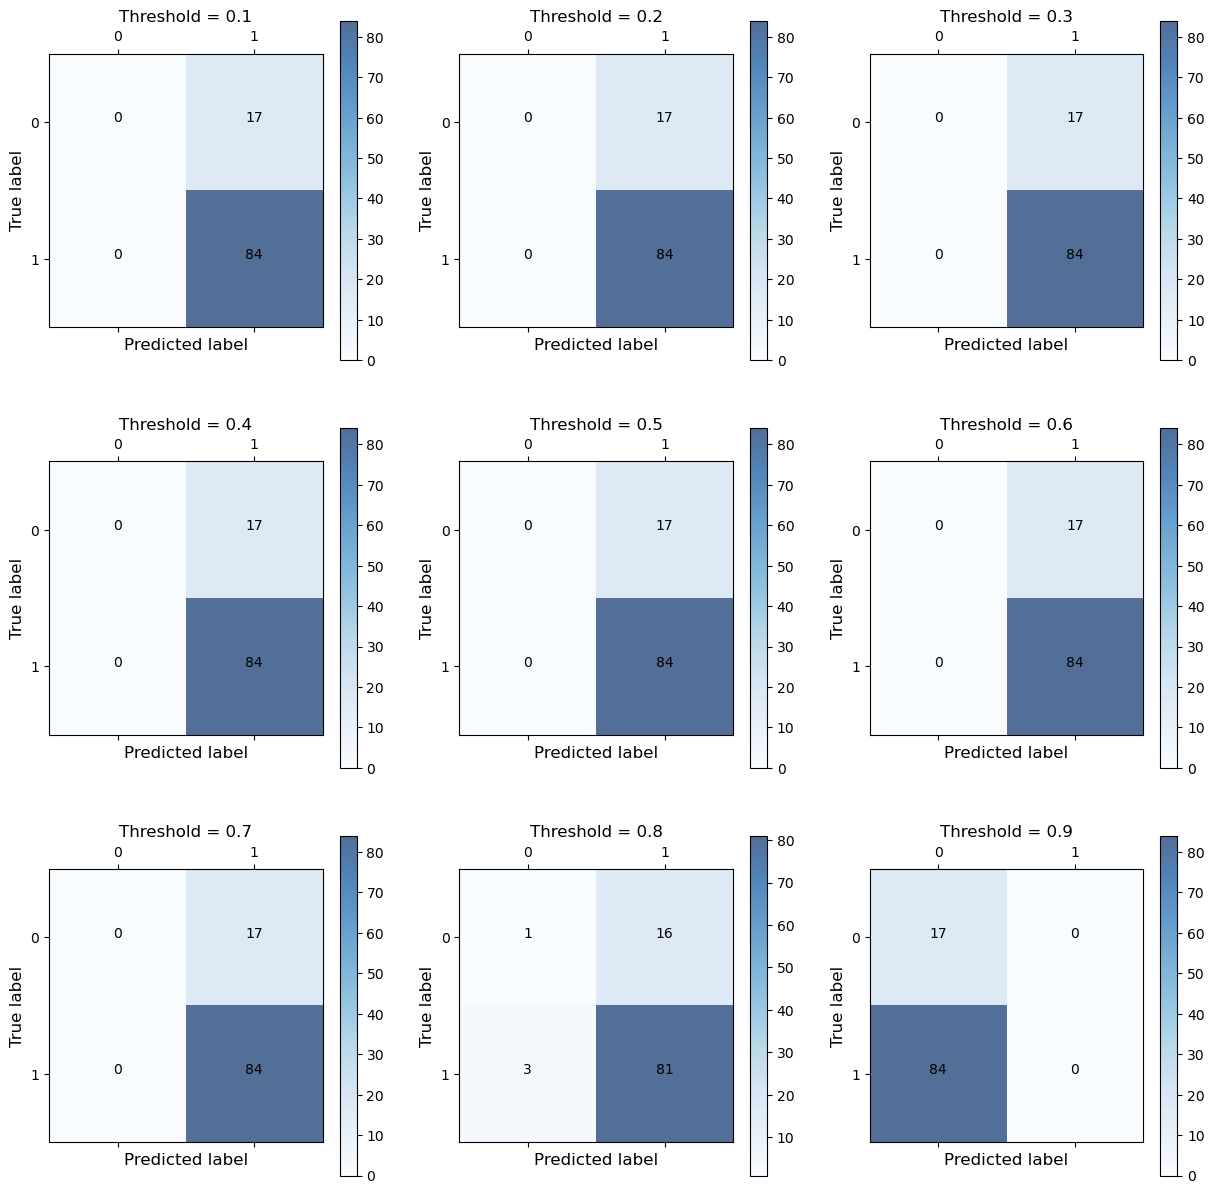

In [95]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for n, ax in zip(thresholds,axs.ravel()):
    y_score = logReg_PCA.predict_proba(X_PCA_test)[:,1] > n
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('threshold = %s :'%n,
          'Accuracy={:.3f}'.format((tp+tn)/(tp+tn+fp+fn)),
          'Sensitivity={:.3f}'.format(tp/(tp+fn)),
          'Specificity={:.3f}'.format(tn/(tn+fp)),
          'Precision={:.3f}'.format(tp/(tp+fp)))
    
    im=ax.matshow(cm, cmap='Blues', alpha=0.7)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        ax.text(j, i, cm[i, j], horizontalalignment = 'center')
        
    ax.set_ylabel('True label',fontsize=12)
    ax.set_xlabel('Predicted label',fontsize=12)
    ax.set_title('Threshold = %s'%n, fontsize=12)
    fig.colorbar(im, ax=ax,orientation='vertical');
plt.show()

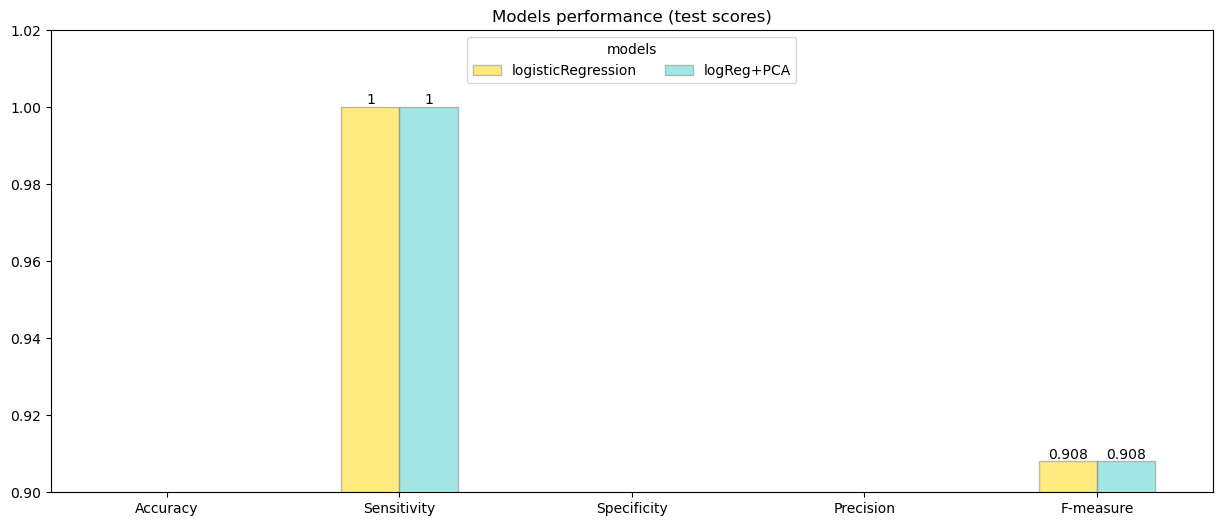

In [96]:
models_metrics = {'logisticRegression': [round(elem, 3) for elem in logReg_metrics], 
                 'logReg+PCA': [round(elem, 3) for elem in logReg_PCA_metrics],
                }
index=['Accuracy','Sensitivity','Specificity','Precision', 'F-measure']
df_scores = pd.DataFrame(data = models_metrics, index=index)
ax = df_scores.plot(kind='bar', figsize = (15,6), ylim = (0.90, 1.02), 
                    color = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen','cyan'],
                    rot = 0, title ='Models performance (test scores)',
                    edgecolor = 'grey', alpha = 0.5)
ax.legend(loc='upper center', ncol=5, title="models")
for container in ax.containers:
    ax.bar_label(container)
plt.show()
# plt.savefig("model_performance.jpg") #didnt work

**7. Creating the pipeline in MLOps** 

In [99]:
# Set up MLflow tracking
mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment('Thesis')

# Start MLflow run and log parameters
with mlflow.start_run():
    mlflow.log_param('Logistic_regression', 1)

    # Log evaluation metrics
    mlflow.log_metric('Accuracy', logReg_metrics[0])
    mlflow.log_metric('Sensitivity', logReg_metrics[1])
    mlflow.log_metric('Specificity', logReg_metrics[2])
    mlflow.log_metric('Precision', logReg_metrics[3])
    mlflow.log_metric('F-measure', logReg_metrics[4])

    # Log confusion matrix as artifact
    mlflow.log_artifact('roc.png', 'roc.png')

    # Log model performance plot as artifact
    mlflow.log_artifact('model_performance.png', 'model_performance.png')  # Log the PNG file

print('MLflow run completed.')

# Detener el flujo de MLflow
mlflow.end_run()

2024/05/06 22:25:58 INFO mlflow.tracking.fluent: Experiment with name 'Thesis' does not exist. Creating a new experiment.


MLflow run completed.


**Conclusion**

We have to check data to get better scores in all parametters, for the end of this investigation the sensitivity is very important but data has to be checked to get better scores.